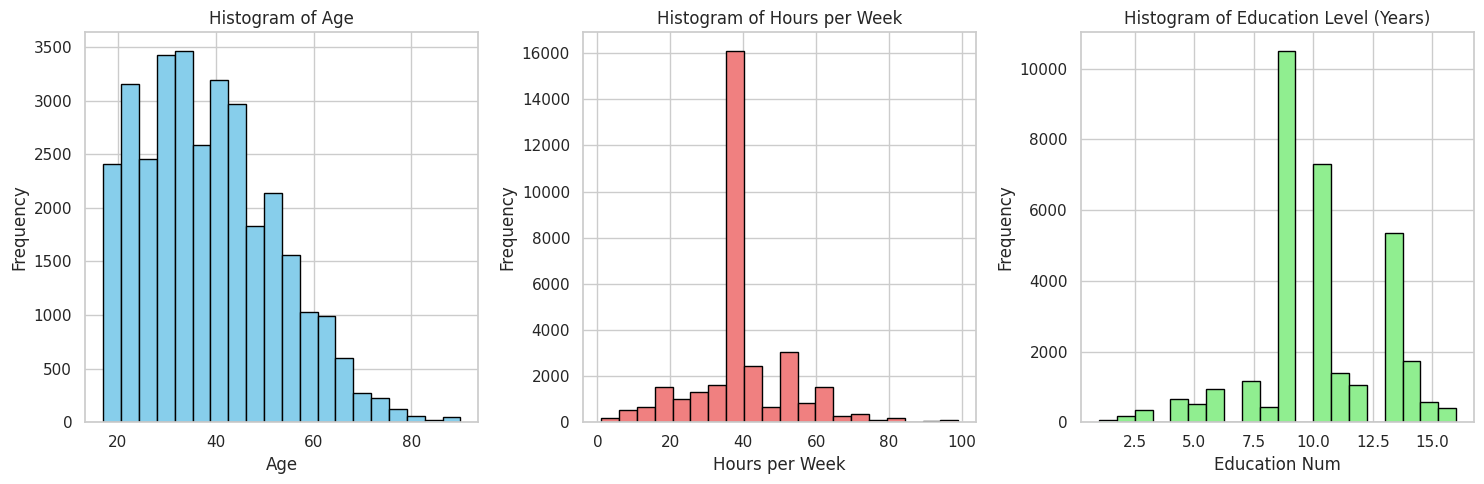

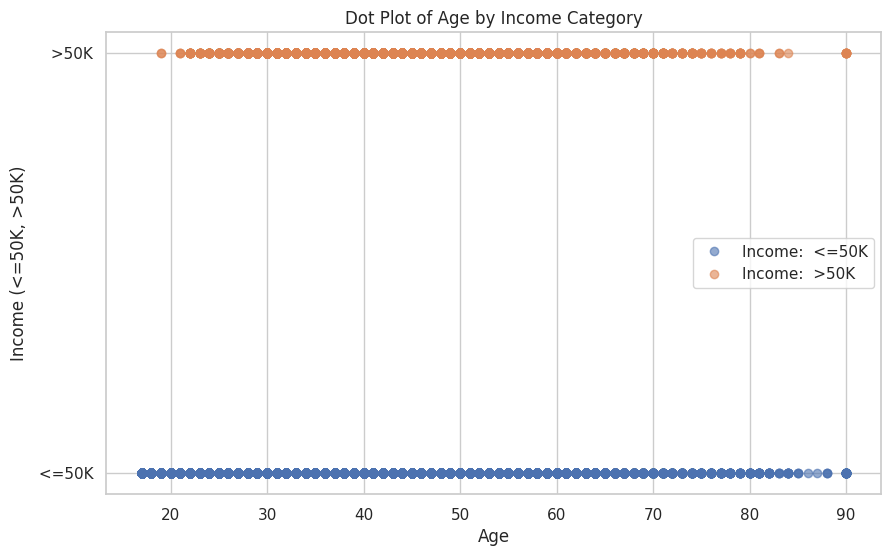

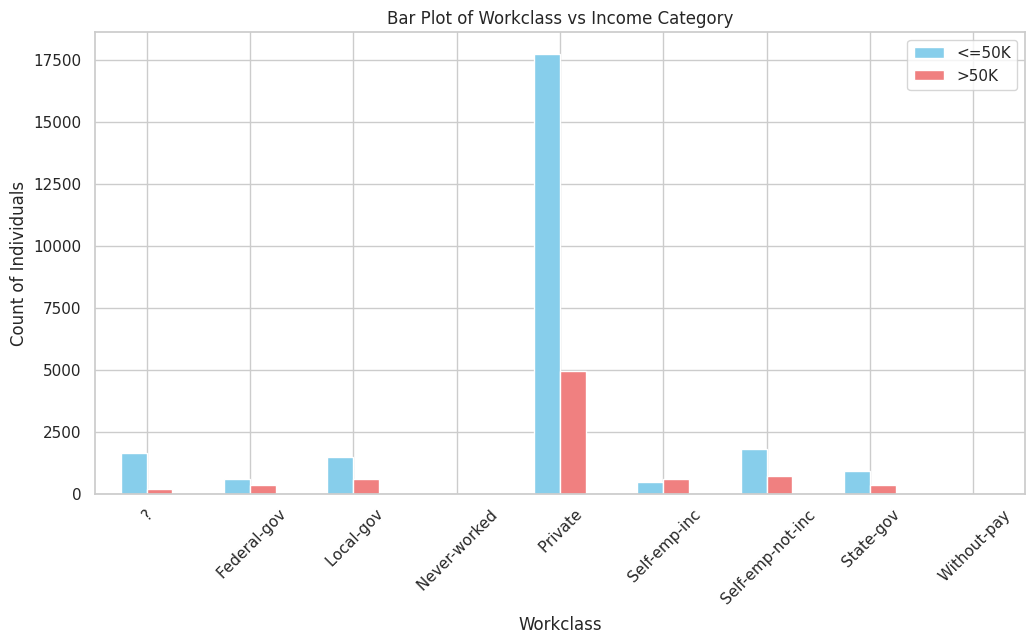

<ipython-input-2-30656a976b3c>:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_hours_by_age = df.groupby(age_bins)['hours_per_week'].mean()


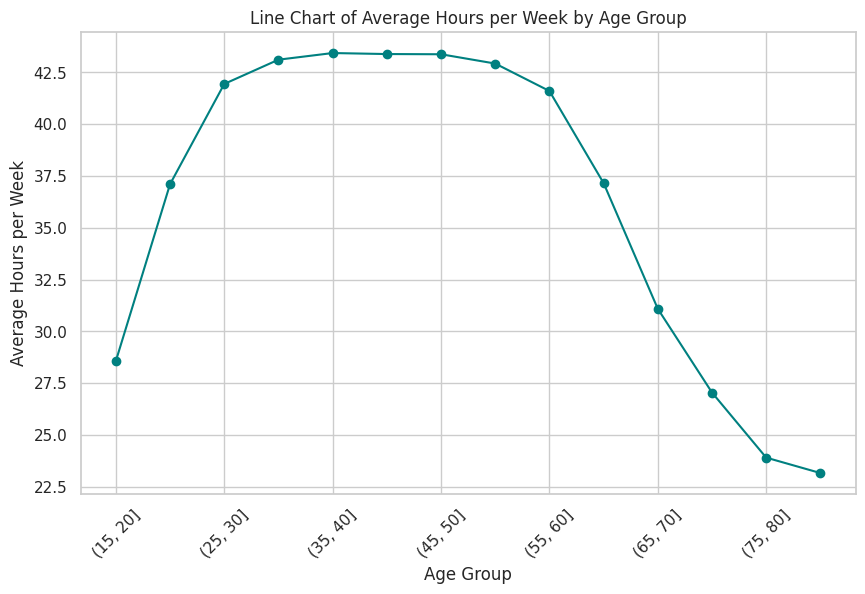

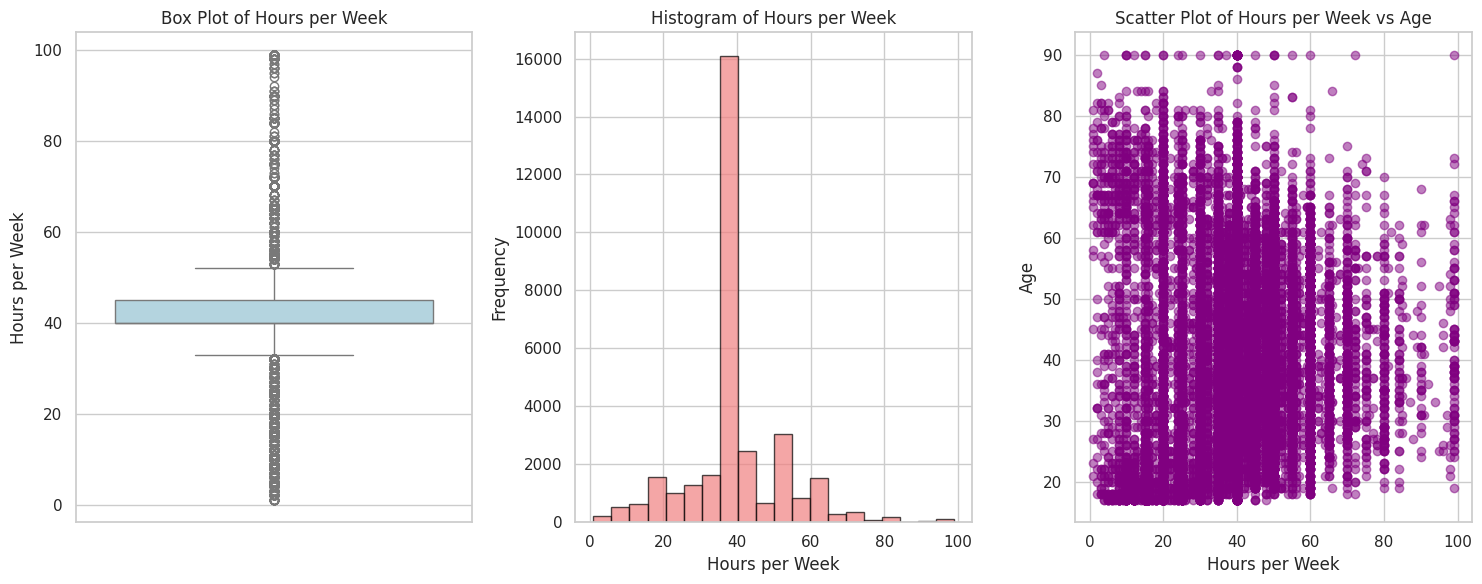

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset with defined column names
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
           'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
           'hours_per_week', 'native_country', 'income']
df = pd.read_csv('adult.csv', header=None, names=columns)

# Set the seaborn style
sns.set(style="whitegrid")

# f. Histograms
# Objective: To visualize the distribution of continuous variables (age, hours_per_week, education_num)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['hours_per_week'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['education_num'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Education Level (Years)')
plt.xlabel('Education Num')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# g. Dot Plots
# Objective: To show individual data points for age by income category
plt.figure(figsize=(10, 6))
for income_val in df['income'].unique():
    subset = df[df['income'] == income_val]
    plt.plot(subset['age'], [income_val] * len(subset), 'o',
             label=f'Income: {income_val}', alpha=0.6)
plt.title('Dot Plot of Age by Income Category')
plt.xlabel('Age')
plt.ylabel('Income (<=50K, >50K)')
plt.legend()
plt.show()

# h. Bar Plots
# Objective: To compare the count of individuals by workclass and income category
workclass_counts = df.groupby(['workclass', 'income']).size().unstack()
workclass_counts.plot(kind='bar', stacked=False, figsize=(12, 6), color=['skyblue', 'lightcoral'])
plt.title('Bar Plot of Workclass vs Income Category')
plt.xlabel('Workclass')
plt.ylabel('Count of Individuals')
plt.legend(['<=50K', '>50K'])
plt.xticks(rotation=45)
plt.show()

# i. Line Charts
# Objective: To show the trend of average hours per week across age groups
age_bins = pd.cut(df['age'], bins=range(15, 90, 5))
avg_hours_by_age = df.groupby(age_bins)['hours_per_week'].mean()
plt.figure(figsize=(10, 6))
avg_hours_by_age.plot(kind='line', marker='o', color='teal')
plt.title('Line Chart of Average Hours per Week by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Hours per Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# j. Box Plot with Histogram and Scatter Plot
# Objective: To provide a comprehensive view of hours_per_week distribution with additional context
plt.figure(figsize=(15, 6))

# Box Plot
plt.subplot(1, 3, 1)
sns.boxplot(y=df['hours_per_week'], color='lightblue')
plt.title('Box Plot of Hours per Week')
plt.ylabel('Hours per Week')

# Histogram
plt.subplot(1, 3, 2)
plt.hist(df['hours_per_week'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Histogram of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')

# Scatter Plot
plt.subplot(1, 3, 3)
plt.scatter(df['hours_per_week'], df['age'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Hours per Week vs Age')
plt.xlabel('Hours per Week')
plt.ylabel('Age')
plt.tight_layout()
plt.show()